In [2]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import pathlib as pl
import os 
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# Breast Cancer Screening Classification 

The dataset you will be working with comes from The Breast Cancer Surveillance Consortium, an American organisation that does research into Breast Cancer. To download a fresh copy of the dataset, go to https://www.bcsc-research.org/data/rfdataset, and for information on each of variables in the dataset, see https://www.bcsc-research.org/data/mammography_dataset/dataset_documentation.

In this notebook you will be looking at the effectiveness of mammogram breast cancer screening for women aged 60-83. For more information on breast cancer screening see https://www.cancerresearchuk.org/about-cancer/breast-cancer/getting-diagnosed/screening/breast-screening

In this notebook you will create confusion matrices and calculate the specificity and sensitivity of both the whole data and each age group within the datasets. 

### First load the dataset

In [3]:
path_csv = pl.Path(os.getcwd()) / f'dataset.csv'
with open(path_csv, 'rb') as file:
    data = pd.read_csv(file)

## Section 1: Confusion Matrix 

### TODO: Write code to create a confusion matrix for the dataset

For this dataset, we are comparing the radiologist's assessment to the true cancer state of the patient. 

Values of  1, 2 or 3 in the assess_c column are counted as being predictions of no cancer, while predictions of 0, 4 or 5 are counted as being predictions of cancer. 

Use the 'cancer_c' column as the true indicator of if the patient has cancer, with 0 indicating no cancer and 1 indicating cancer. 

Use these values to calculate the number of true positives, false negatives, true negatives and false positives and plot a confusion matrix. 

HINT: you can use seaborn heatmaps to plot your confusion matrix. If you convert your confusion matrix into a dataframe first with correctly labelled columns and indexes, you can get the correct labels on your heatmap. 

In [6]:
#### ANSWER ####

def get_confusion_matrix(df): 
    """creates a confusion matrix for the breast cancer screening data 
    :param df: a dataframe of the data
    :returns: np.array confusion matrix"""
    
#     negatives = ['Negative', 'Benign findings', 'Probably benign']
#     positives = ['Needs additional imaging', 'Suspicious abnormality', 'Highly suggestive of malignancy']
#     cancer = ['Invasive cancer', 'ductal carcinoma in situ' ]
#     no_cancer = ['No cancer diagnosis']
    
    negatives = [1, 2, 3]
    positives = [0, 4, 5]
    cancer = [1]
    no_cancer = [0]

    TP = len(df.loc[df['assess_c'].isin(positives) & df['cancer_c'].isin(cancer)])
    FN = len(df.loc[df['assess_c'].isin(negatives) & df['cancer_c'].isin(cancer)])
    TN = len(df.loc[df['assess_c'].isin(negatives) & df['cancer_c'].isin(no_cancer)])
    FP = len(df.loc[df['assess_c'].isin(positives) & df['cancer_c'].isin(no_cancer)])
    
    return np.array([[TN, FN], [FP, TP]])

          Negative  Positive
Negative     36856        33
Positive      2885       226


Text(33.0, 0.5, 'Predicted Value')

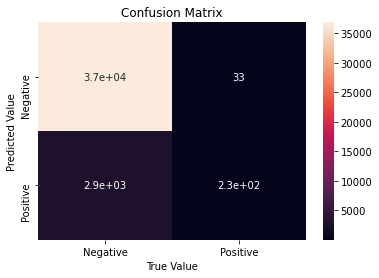

In [8]:
### ANSWER 

confusion_matrix = get_confusion_matrix(data)

plt.title('Confusion Matrix')
cf = pd.DataFrame(data = confusion_matrix, columns = ['Negative', 'Positive'], index = ['Negative', 'Positive'])
print(cf)
sn.heatmap(cf, annot=True)

plt.xlabel('True Value')
plt.ylabel('Predicted Value')

## Section 2: Calculate the Sensitivity and Specificity 

### TODO: Write a function to calculate the sensitivity and specificity of the breast cancer screening 

Calculate the sensitivity and specificity of the breast cancer screening and answer the first questions that go alongside this notebook. 

In [9]:
#### ANSWER ###

def calculate_sensitivity_specificity(confusion_matrix):
    """calcuates sensitivity and specficity based on the True Positives, False Negatives, True Negatives and False Negatives"""
    cm = confusion_matrix

    sensitivity = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    specificity = cm[0,0] / (cm[0,0] + cm[1,0])
    return sensitivity, specificity

In [10]:
### ANSWER ###
sens, spec = calculate_sensitivity_specificity(confusion_matrix)
print(sens, spec)

0.8725868725868726 0.9274049470320324


## Section 3: Comparing the different Age Groups

### TODO: For each age group ( 60-69, 70-79 and 80-89) plot a confusion matrix and calculate the specificty and sensitivity 

In [12]:
### ANSWER 

age_60s = data.loc[data['age_c'] < 70]
age_70s = data.loc[(data['age_c'] >=70) & (data['age_c'] <80)]
age_80s = data.loc[data['age_c'] >= 80]

age_dfs = [age_60s, age_70s, age_80s]

60-69 0.8686131386861314 0.9229264297738751
70-79 0.8735632183908046 0.9340734028092433
80-89 0.8857142857142857 0.929646017699115


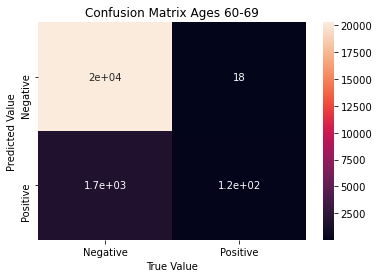

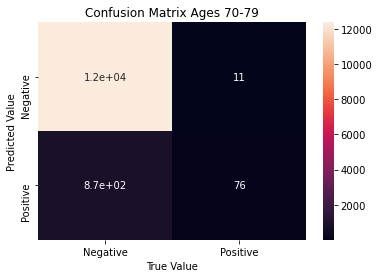

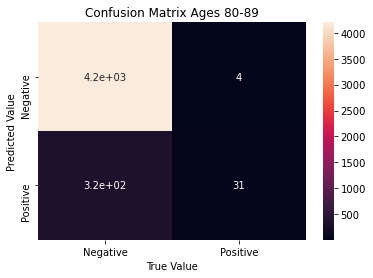

In [13]:
### ANSWER ###

results = {}
ages = ['60-69', '70-79', '80-89']
for i, df in enumerate(age_dfs):
    confusion_matrix = get_confusion_matrix(df)
    results[ages[i]] = confusion_matrix
    
    sens, spec = calculate_sensitivity_specificity(confusion_matrix)
    
    fig = plt.figure()
    plt.title(f'Confusion Matrix Ages {ages[i]}')

    cf = pd.DataFrame(data = confusion_matrix, columns = ['Negative', 'Positive'], index = ['Negative', 'Positive'])
#     print(cf)
    sn.heatmap(cf, annot=True)

    plt.xlabel('True Value')
    plt.ylabel('Predicted Value')
    
    print(ages[i], sens, spec)